In [1]:
seed = 13427256

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sk_PCA
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans as sk_KMeans, DBSCAN as sk_DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

# Q1 

In [41]:
df_songs = pd.read_csv("spotify52kData.csv")

In [42]:
df_songs = (df_songs.groupby(["track_name", "artists"]).max().reset_index().sort_values(by="songNumber")
               .reset_index(drop=True)) 

In [43]:
correlation = df_songs['popularity'].corr(df_songs['duration'])
correlation

-0.09914092879767808

In [44]:
X = df_songs[['duration']]
y = df_songs['popularity']
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [45]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

In [46]:
slope

-1.5823279518459893e-05

In [47]:
intercept

38.982609286395224

/tmp/ipykernel_38170/2262620334.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='duration',


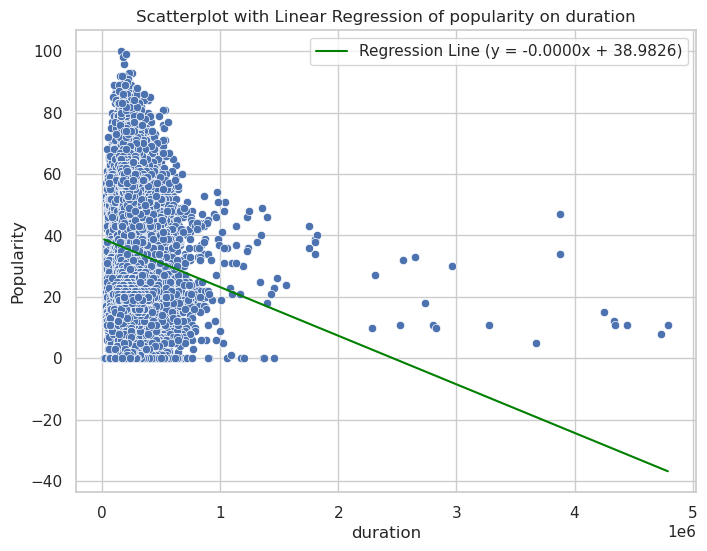

In [48]:
sns.set(style="whitegrid")  # Set seaborn style
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(x='duration',
                y='popularity',
                data=df_songs,
                palette='coolwarm',
                legend='full')

# Plot the regression line
x_range = np.linspace(df_songs['duration'].min(), df_songs['duration'].max(), 100)
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, color='green', label=f'Regression Line (y = {slope:.4f}x + {intercept:.4f})')

# Add a title and labels
plt.title('Scatterplot with Linear Regression of popularity on duration')
plt.xlabel('duration')
plt.ylabel('Popularity')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [49]:

X = sm.add_constant(X)
regressor = sm.OLS(y, X).fit()

# Perform a t-test for the slope parameter
t_statistic = regressor.tvalues['duration']
p_value = regressor.pvalues['duration']

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print(f'The p-value ({p_value:.4f}) is less than alpha ({alpha}), so the slope is statistically significant.')
else:
    print(f'The p-value ({p_value:.4f}) is greater than alpha ({alpha}), so the slope is not statistically significant.')

# Print the t-statistic and p-value
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

The p-value (0.0000) is less than alpha (0.05), so the slope is statistically significant.
T-Statistic: -20.3578
P-Value: 0.0000


In [50]:
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     414.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.10e-91
Time:                        15:40:48   Log-Likelihood:            -1.8345e+05
No. Observations:               41753   AIC:                         3.669e+05
Df Residuals:                   41751   BIC:                         3.669e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.9826      0.204    190.838      0.0

## With log transformation of the duration variable

In [51]:
df_songs = df_songs.assign(logduration=np.log(df_songs[['duration']]))

In [52]:
df_songs

,track_name,artists,songNumber,album_name,popularity,duration,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,logduration
0,Comedy,Gen Hoshino,0,Comedy,73,230666,False,0.676,0.461,1,...,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic,12.348726
1,To Begin Again,Ingrid Michaelson;ZAYN,2,To Begin Again,57,210826,False,0.438,0.359,0,...,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic,12.258788
2,Hunger,Ross Copperman,9,Hunger,56,205594,False,0.442,0.632,1,...,1,0.0295,0.42600,0.004190,0.0735,0.196,78.899,4,acoustic,12.233659
3,Hold On - Remix,Chord Overstreet;Deepend,14,Hold On (Remix),56,188133,False,0.755,0.780,2,...,1,0.0327,0.12400,0.000028,0.1210,0.387,120.004,4,acoustic,12.144904
4,Lucky,Jason Mraz;Colbie Caillat,18,We Sing. We Dance. We Steal Things.,74,189613,False,0.625,0.414,0,...,1,0.0369,0.29400,0.000000,0.1510,0.669,130.088,4,acoustic,12.152740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41748,Hasta Abajo,Don Omar,51993,Feliz Cumpleaños con Perreo,1,233720,False,0.759,0.885,7,...,1,0.0636,0.35100,0.000037,0.4680,0.673,89.966,4,hip-hop,12.361879
41749,Tu Cuerpo Me Arrebata,Don Omar;Trebol Clan,51995,Perreo Tenebroso Vol. 3,0,203653,False,0.819,0.645,10,...,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop,12.224173
41750,Dale Don Dale,Don Omar,51997,Última Misión Reggaeton,1,212413,False,0.831,0.818,2,...,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop,12.266288
41751,Switches & Dracs,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,51998,Energy Hip Hop,0,168620,True,0.727,0.647,11,...,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop,12.035403


In [53]:
correlation = df_songs['popularity'].corr(df_songs['logduration'])
correlation

-0.0551229518763871

In [54]:
X = np.log(df_songs[['duration']])
y = df_songs['popularity']
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [55]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

In [56]:
slope

-2.5582074419922534

In [57]:
intercept

66.68748960025556

/tmp/ipykernel_38170/922198634.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='logduration',


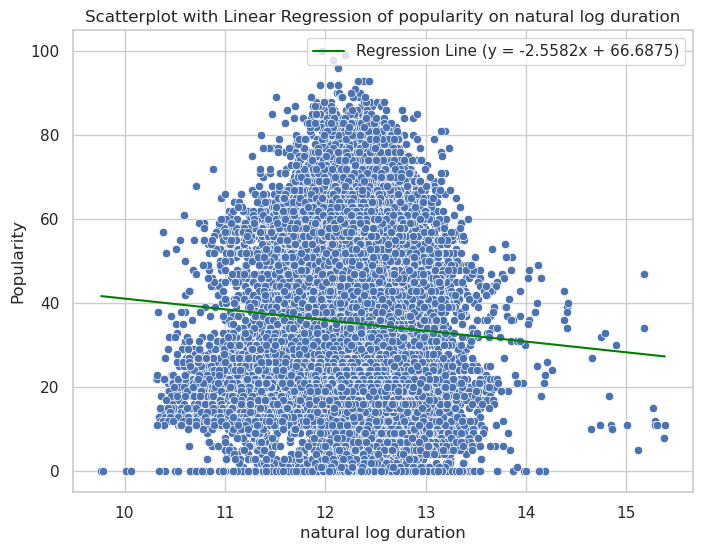

In [58]:
sns.set(style="whitegrid")  # Set seaborn style
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(x='logduration',
                y='popularity',
                data=df_songs,
                palette='coolwarm',
                legend='full')

# Plot the regression line
x_range = np.linspace(df_songs['logduration'].min(), df_songs['logduration'].max(), 100)
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, color='green', label=f'Regression Line (y = {slope:.4f}x + {intercept:.4f})')

# Add a title and labels
plt.title('Scatterplot with Linear Regression of popularity on natural log duration')
plt.xlabel('natural log duration')
plt.ylabel('Popularity')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [59]:
X = sm.add_constant(X)
regressor = sm.OLS(y, X).fit()

# Perform a t-test for the slope parameter
t_statistic = regressor.tvalues['duration']
p_value = regressor.pvalues['duration']

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print(f'The p-value ({p_value:.4f}) is less than alpha ({alpha}), so the slope is statistically significant.')
else:
    print(f'The p-value ({p_value:.4f}) is greater than alpha ({alpha}), so the slope is not statistically significant.')

# Print the t-statistic and p-value
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

The p-value (0.0000) is less than alpha (0.05), so the slope is statistically significant.
T-Statistic: -11.2805
P-Value: 0.0000


In [60]:
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     127.2
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.81e-29
Time:                        15:41:00   Log-Likelihood:            -1.8359e+05
No. Observations:               41753   AIC:                         3.672e+05
Df Residuals:                   41751   BIC:                         3.672e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.6875      2.783     23.961      0.0

# Q2 Are explicitly rated songs more popular than songs that are not explicit?

In [61]:
non_explicit = df_songs[df_songs['explicit'] == False][['popularity']]
non_explicit

,popularity
0,73
1,57
2,56
3,56
4,74
...,...
41746,74
41748,1
41749,0
41750,1


In [62]:
explicit = df_songs[df_songs['explicit'] == True][['popularity']]
explicit

,popularity
18,57
161,37
165,36
209,35
304,32
...,...
41732,1
41734,1
41744,1
41747,0


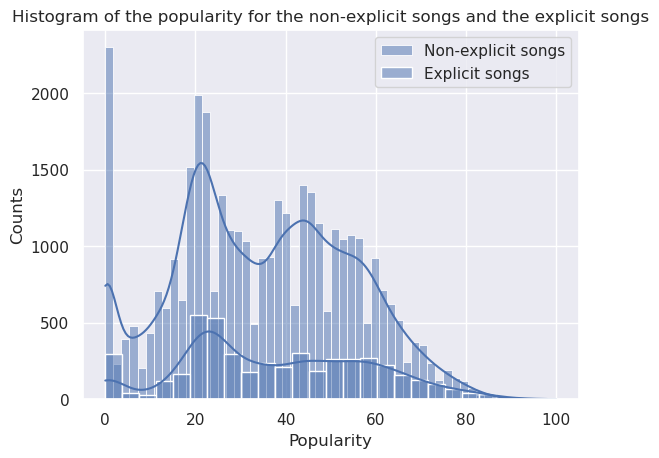

In [63]:

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")


sns.histplot(data=non_explicit, color="skyblue", label="Non-explicit songs", kde=True)
sns.histplot(data=explicit, color="red", label="Explicit songs", kde=True)

plt.xlabel('Popularity')
plt.ylabel('Counts')
plt.title("Histogram of the popularity for the non-explicit songs and the explicit songs")
plt.legend()
plt.show()

In [64]:
# difference in means
np.mean(non_explicit)-np.mean(explicit)

-3.031778426543582

In [65]:
# difference in medians
np.median(non_explicit)-np.median(explicit)

-2.0

In [66]:
stats.mannwhitneyu(non_explicit, explicit) 

MannwhitneyuResult(statistic=array([80013245.5]), pvalue=array([1.66784775e-19]))

In [67]:
stats.ttest_ind(non_explicit, explicit)

TtestResult(statistic=array([-9.95905659]), pvalue=array([2.44472144e-23]), df=array([41751.]))

Yes. Based on the p value, reject the null, accpet the alternative: population means are different. And explicitly rated songs more popular than songs that are not explicit songs. 

In [ ]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)


In [ ]:
from scipy.stats import permutation_test
res = permutation_test((non_explicit, explicit), statistic, alternative='less')

In [ ]:
res

In [ ]:
res.null_distribution

In [ ]:
plt.hist(res.null_distribution, bins = 100)
plt.axvline(x = 3, color = 'r')
plt.xlabel('Difference of means')
plt.ylabel('counts')
plt.title("Null distribution if non-explicit songs and the explicit songs have the same mean")

# Q6

When considering the 10 song features in the previous question, how many meaningful principal components can you extract? What proportion of the variance do these principal components account for? Using these principal components, how many clusters can you identify? Do these clusters reasonably correspond to the genre labels in column 20 of the data?

In [68]:
songs_feature = df_songs[['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']]
songs_feature

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,230666,0.676,0.461,-6.746,0.1430,0.03220,0.000001,0.3580,0.715,87.917
1,210826,0.438,0.359,-9.734,0.0557,0.21000,0.000000,0.1170,0.120,76.332
2,205594,0.442,0.632,-6.770,0.0295,0.42600,0.004190,0.0735,0.196,78.899
3,188133,0.755,0.780,-6.084,0.0327,0.12400,0.000028,0.1210,0.387,120.004
4,189613,0.625,0.414,-8.700,0.0369,0.29400,0.000000,0.1510,0.669,130.088
...,...,...,...,...,...,...,...,...,...,...
41748,233720,0.759,0.885,-4.516,0.0636,0.35100,0.000037,0.4680,0.673,89.966
41749,203653,0.819,0.645,-6.707,0.0481,0.23200,0.000863,0.1780,0.724,94.998
41750,212413,0.831,0.818,-7.827,0.0824,0.02450,0.000319,0.0892,0.819,95.022
41751,168620,0.727,0.647,-7.383,0.2800,0.03290,0.000000,0.2460,0.529,159.959


In [69]:
class PCA():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and
    maximizing the variance along each feature axis.
    """
    def _init__(self):
        self.eigenValues=None
        self.components=None
    def transform(self, X, n_components):
        """ Fit the dataset to the number of principal components specified in the
        constructor and return the transformed dataset """
        covariance_matrix = self.calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1] # [3, 2, 1] ---> [2, 1, 0] --> [0, 1, 2]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
        
        # Set the object variables
        self.eigenValues=eigenvalues
        self.components=eigenvectors

        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed
    
    def calculate_covariance_matrix(self, X, Y=None):
        """ Calculate the covariance matrix for the dataset X """
        if Y is None:
            Y = X
        n_samples = np.shape(X)[0]
        covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

        return np.array(covariance_matrix, dtype=float)

In [70]:
pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA())])
pca_pipeline.fit(songs_feature)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA())])

In [71]:
eigVals=pca_pipeline[1].explained_variance_

In [72]:
eigVals

array([2.70073184, 1.63111187, 1.42557944, 0.99143999, 0.87338932,
       0.81209706, 0.6547605 , 0.46588092, 0.31497173, 0.13027684])

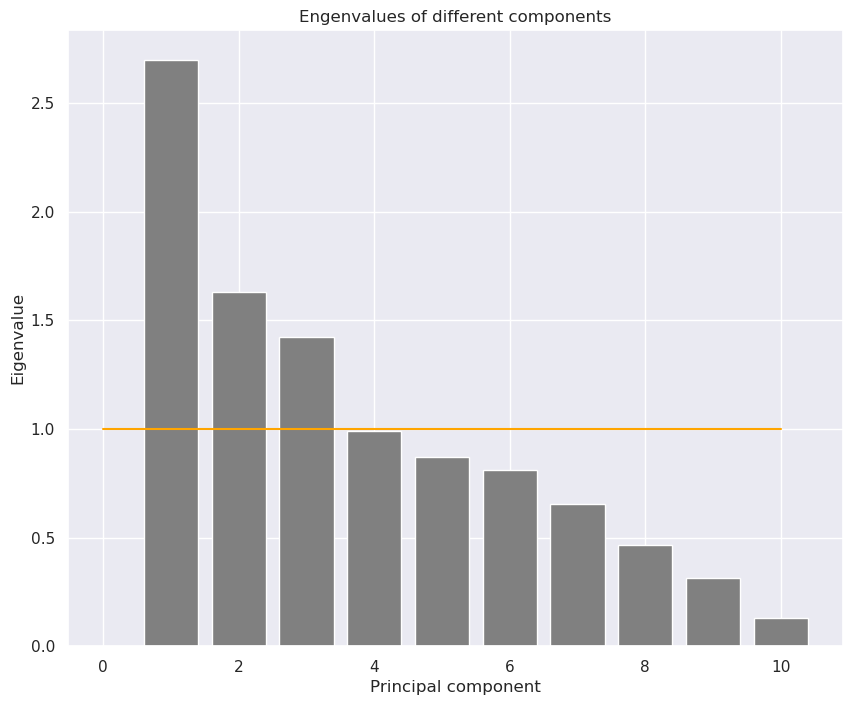

In [73]:
## Kaiser Criterion: Consider all principal components with eigen values greater than 1.0
eigVals=pca_pipeline[1].explained_variance_
nComponents = 10
x = np.linspace(1,nComponents, nComponents)
plt.figure(figsize=(10, 8))
plt.bar(x, eigVals, color='gray')
plt.plot([0,nComponents],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.title("Engenvalues of different components")

plt.show()

According to Kaiser Criterion we should consider 6 principal components, so the data after dimensionality reduction should be (52000,3) 

In [74]:
covarExplained = eigVals/sum(eigVals)*100
print("Variance explained by the 3 PCs above is: %.3f " % (sum(covarExplained[:3])))

Variance explained by the 3 PCs above is: 57.573 


In [75]:
## Do PCA and plot the features. Since there are three types of iris, ideally we should be able to see 3 well seperated clusters
pca=PCA()
feature_transformed=pca.transform(StandardScaler().fit_transform(songs_feature), 3)

In [76]:
feature_transformed

array([[ 0.36126622,  1.40746364, -0.34909987],
       [-1.35059756, -0.36089995, -0.05037921],
       [-0.71647236, -0.27482382,  0.11200858],
       ...,
       [ 1.07094607,  1.77369456,  1.04770662],
       [ 1.06216795,  0.84287507, -0.40756362],
       [ 1.67515101,  1.07469935,  1.37085622]])

In [77]:
df_feature_transformed = pd.DataFrame(feature_transformed, columns=['PC1','PC2',"PC3"])
df_feature_transformed

,PC1,PC2,PC3
0,0.361266,1.407464,-0.349100
1,-1.350598,-0.360900,-0.050379
2,-0.716472,-0.274824,0.112009
3,0.808618,0.506286,0.794881
4,-0.292143,1.020321,0.761303
...,...,...,...
41748,1.125825,1.378544,-0.555243
41749,0.473336,1.774483,0.755570
41750,1.070946,1.773695,1.047707
41751,1.062168,0.842875,-0.407564


In [79]:
df_feature_transformed.to_csv("pca_features.csv", index=False)

In [ ]:
genre = df_songs[["track_genre"]]
genre           

In [ ]:
genre.value_counts()

In [ ]:
df_feature_transformed['genre'] = genre

In [ ]:
cats = {v:k for k,v in enumerate(df_feature_transformed['genre'].unique())}

In [ ]:
df_feature_transformed["num_genre"] = df_feature_transformed["genre"].apply(cats.get)

In [ ]:
df_feature_transformed

In [ ]:
df_feature_transformed

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_feature_transformed[['PC1']],df_feature_transformed[['PC2']],df_feature_transformed[['PC3']],alpha=0.7,c = df_feature_transformed[['num_genre']])
plt.title("3D scatter plot of songs' features with principal components with 52 genres")
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel("PC3")
# show plot
plt.show()

In [ ]:
l = []
for i in range(2, 53):
    km = sk_KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit_predict(feature_transformed)
    score = silhouette_score(feature_transformed, km.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)
    l.append(score)

In [ ]:
l

In [ ]:
plt.plot(range(2,53), l)
plt.title('Silhouetter Score with different number of clusters')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouetter Score")

In [ ]:
km = sk_KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = km.fit_predict(feature_transformed)
cluster

In [ ]:
df_feature_transformed['kmeans'] = cluster
df_feature_transformed

In [ ]:
df_feature_transformed

# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_feature_transformed[['PC1']],df_feature_transformed[['PC2']],df_feature_transformed[['PC3']],alpha=0.5,c = df_feature_transformed[['kmeans']])
plt.title("3D scatter plot of songs' features with principal components with 2 Kmeans clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel("PC3")
 
# show plot
plt.show()

In [ ]:
c1 = df_feature_transformed.query("kmeans == 0")["genre"].value_counts()

In [ ]:
c2 = df_feature_transformed.query("kmeans == 1")["genre"].value_counts()

In [ ]:
((c1-c2).abs()/1000).fillna(1).sort_values()